# Model evaluation

## Prediction on dataset

In [ ]:
import os
import shutil
import subprocess

from tqdm import tqdm

from datasets import get_dataset
from models import get_pretrained
from utils import is_equal

from utils import *
from datasets import *
from utils.med_utils import *
from utils.med_utils.sparse_utils import sparse_argmax

try:
    tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[:1], 'GPU')
except:
    pass

dataset   = get_dataset('total_segmentator', output_format = ('stensor', 'npz', 'nii.gz'))

keep_mask = dataset['segmentation'].apply(lambda f: not f.endswith('.nii.gz'))
dataset   = dataset[keep_mask]

alias   = {'test2_task_256' : 'converted_totalsegmentator_lowres'}
models  = ['test2_task_256']



for model_name in models:
    model_dir = alias.get(model_name, model_name)
    
    for suffix in ('', ):
        model = get_pretrained(model_name)
        res = model.predict(
            dataset.iloc[:],

            win_len     = (96, 96, 96) if 'slice' not in suffix else 128,
            hop_len     = 64,

            save        = True,
            overwrite   = False,
            directory   = os.path.join('evaluations', model_dir + suffix),
            output_file = lambda f: f.split('/')[-2] + '.npz',

            tqdm = tqdm
        )
        for _, infos in res[:10]:
            out_file = infos['segmentation']
            tar_out_file = out_file.replace('converted_', '').replace('.npz', '.nii.gz').replace(suffix, '')

            out_mask, out_vox_dims = load_medical_data(out_file, use_sparse = True, dtype = tf.uint8)
            out_mask = sparse_argmax(out_mask)

            tar_mask, tar_vox_dims = load_medical_data(
                tar_out_file, use_sparse = False, is_one_hot = False, dtype = tf.int32
            )

            print(is_equal(tar_mask, out_mask)[1])



2023-06-26 11:06:45.147391: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 11:06:45.248472: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-26 11:06:45.273688: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. E

Loading dataset total_segmentator...
Model restoration...
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups will be overwritten.
The given value for groups wil

2023-06-26 11:06:54.871222: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 11:06:55.250951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14783 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5


Initializing submodel : `model` !
Successfully restored model from pretrained_models/test2_task_256/saving/model.json !
Model test2_task_256 initialized successfully !


  0%|                                                                                          | 0/1148 [00:00<?, ?it/s]

volume shape : (1, 116, 118, 118, 1) - steps : [array([ 0, 20], dtype=int32), array([ 0, 22], dtype=int32), array([ 0, 22], dtype=int32)]


2023-06-26 11:06:58.678070: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
  0%|                                                                                | 1/1148 [00:08<2:40:56,  8.42s/it]

volume shape : (1, 96, 96, 96, 1) - steps : [[0], [0], [0]]


  0%|▏                                                                               | 2/1148 [00:09<1:21:22,  4.26s/it]

volume shape : (1, 173, 166, 166, 1) - steps : [array([ 0, 38, 77], dtype=int32), array([ 0, 35, 70], dtype=int32), array([ 0, 35, 70], dtype=int32)]


  0%|▏                                                                               | 3/1148 [00:24<2:52:48,  9.06s/it]

volume shape : (1, 168, 135, 135, 1) - steps : [array([ 0, 36, 72], dtype=int32), array([ 0, 39], dtype=int32), array([ 0, 39], dtype=int32)]


  0%|▎                                                                               | 4/1148 [00:32<2:45:31,  8.68s/it]

volume shape : (1, 126, 96, 96, 1) - steps : [array([ 0, 30], dtype=int32), [0], [0]]


  0%|▎                                                                               | 5/1148 [00:35<2:02:03,  6.41s/it]

volume shape : (1, 114, 128, 128, 1) - steps : [array([ 0, 18], dtype=int32), array([ 0, 32], dtype=int32), array([ 0, 32], dtype=int32)]


  1%|▍                                                                               | 6/1148 [00:40<1:55:18,  6.06s/it]

volume shape : (1, 96, 108, 108, 1) - steps : [[0], array([ 0, 12], dtype=int32), array([ 0, 12], dtype=int32)]


  1%|▍                                                                               | 7/1148 [00:43<1:36:48,  5.09s/it]

volume shape : (1, 106, 96, 130, 1) - steps : [array([ 0, 10], dtype=int32), [0], array([ 0, 34], dtype=int32)]


  1%|▌                                                                               | 8/1148 [00:47<1:30:55,  4.79s/it]

volume shape : (1, 128, 110, 110, 1) - steps : [array([ 0, 32], dtype=int32), array([ 0, 14], dtype=int32), array([ 0, 14], dtype=int32)]


  1%|▋                                                                               | 9/1148 [00:53<1:38:28,  5.19s/it]

volume shape : (1, 232, 150, 150, 1) - steps : [array([  0,  45,  91, 136], dtype=int32), array([ 0, 27, 54], dtype=int32), array([ 0, 27, 54], dtype=int32)]


  1%|▋                                                                              | 10/1148 [01:12<2:57:41,  9.37s/it]

volume shape : (1, 96, 166, 166, 1) - steps : [[0], array([ 0, 35, 70], dtype=int32), array([ 0, 35, 70], dtype=int32)]


  1%|▊                                                                              | 11/1148 [01:16<2:29:41,  7.90s/it]

volume shape : (1, 96, 148, 148, 1) - steps : [[0], array([ 0, 26, 52], dtype=int32), array([ 0, 26, 52], dtype=int32)]


  1%|▊                                                                              | 12/1148 [01:21<2:09:29,  6.84s/it]

volume shape : (1, 106, 118, 118, 1) - steps : [array([ 0, 10], dtype=int32), array([ 0, 22], dtype=int32), array([ 0, 22], dtype=int32)]


  1%|▉                                                                              | 13/1148 [01:26<2:00:10,  6.35s/it]

volume shape : (1, 190, 110, 110, 1) - steps : [array([ 0, 47, 94], dtype=int32), array([ 0, 14], dtype=int32), array([ 0, 14], dtype=int32)]


  1%|▉                                                                              | 14/1148 [01:35<2:14:35,  7.12s/it]

volume shape : (1, 96, 152, 152, 1) - steps : [[0], array([ 0, 28, 56], dtype=int32), array([ 0, 28, 56], dtype=int32)]


  1%|█                                                                              | 15/1148 [01:40<2:03:00,  6.51s/it]

volume shape : (1, 96, 166, 166, 1) - steps : [[0], array([ 0, 35, 70], dtype=int32), array([ 0, 35, 70], dtype=int32)]


  1%|█                                                                              | 16/1148 [01:46<1:57:39,  6.24s/it]

volume shape : (1, 96, 97, 97, 1) - steps : [[0], array([0, 1], dtype=int32), array([0, 1], dtype=int32)]


  1%|█▏                                                                             | 17/1148 [01:49<1:40:49,  5.35s/it]

volume shape : (1, 139, 110, 110, 1) - steps : [array([ 0, 43], dtype=int32), array([ 0, 14], dtype=int32), array([ 0, 14], dtype=int32)]


  2%|█▏                                                                             | 18/1148 [01:54<1:40:18,  5.33s/it]

volume shape : (1, 96, 132, 132, 1) - steps : [[0], array([ 0, 36], dtype=int32), array([ 0, 36], dtype=int32)]


  2%|█▎                                                                             | 19/1148 [01:58<1:29:48,  4.77s/it]

volume shape : (1, 118, 125, 125, 1) - steps : [array([ 0, 22], dtype=int32), array([ 0, 29], dtype=int32), array([ 0, 29], dtype=int32)]


  2%|█▍                                                                             | 20/1148 [02:04<1:35:59,  5.11s/it]

volume shape : (1, 224, 142, 142, 1) - steps : [array([  0,  43,  85, 128], dtype=int32), array([ 0, 46], dtype=int32), array([ 0, 46], dtype=int32)]


## Evaluation

In [1]:
import os
import glob
import importlib
import numpy as np
import pandas as pd
import tensorflow as tf

from tqdm import tqdm
from sklearn.metrics import multilabel_confusion_matrix

from utils import plot_utils
from utils import load_json, dump_json, plot, plot_multiple, plot_volume
from datasets import get_dataset, train_test_split
from utils.med_utils import TOTALSEGMENTATOR_LABELS, load_medical_data, transform_mask
from utils.med_utils.sparse_utils import sparse_argmax

try:
    tf.config.set_visible_devices([], 'GPU')
except:
    pass

models       = ['totalsegmentator_lowres', 'totalsegmentator_fullres']
dataset_name = 'total_segmentator'

dataset = get_dataset(dataset_name)

keep_mask = dataset['segmentation'].apply(lambda f: not f.endswith('.nii.gz'))
skipped   = dataset[~keep_mask]
dataset   = dataset[keep_mask]

if isinstance(dataset, dict):
    train, valid = dataset['train'], dataset['valid']
else:
    train, valid = train_test_split(
        dataset, train_size = 0.9, shuffle = True, random_state = 10, split_by_unique = True, min_occurence = 0
    )
    #valid = pd.concat([valid, skipped], axis = 0)
    

print('Dataset length ({} data skipped, {} ids) :\n  Train size : {} ({} ids)\n  Valid size : {} ({} ids)'.format(
    len(keep_mask) - np.sum(keep_mask.values), len(dataset['id'].unique()), 
    len(train), len(train['id'].unique()), len(valid), len(valid['id'].unique())
))
print('# ids in valid that are also in train : {}'.format(len([id_i for id_i in valid['id'].unique() if id_i in train['id'].values])))

2023-06-27 11:05:53.751850: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 11:05:53.848879: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-27 11:05:53.873070: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. E

Loading dataset total_segmentator...
Dataset length (1 data skipped, 1202 ids) :
  Train size : 1081 (1081 ids)
  Valid size : 121 (121 ids)
# ids in valid that are also in train : 0


100%|████████████████████████████████████████████████████████████████████████████| 1202/1202 [00:00<00:00, 41087.79it/s]


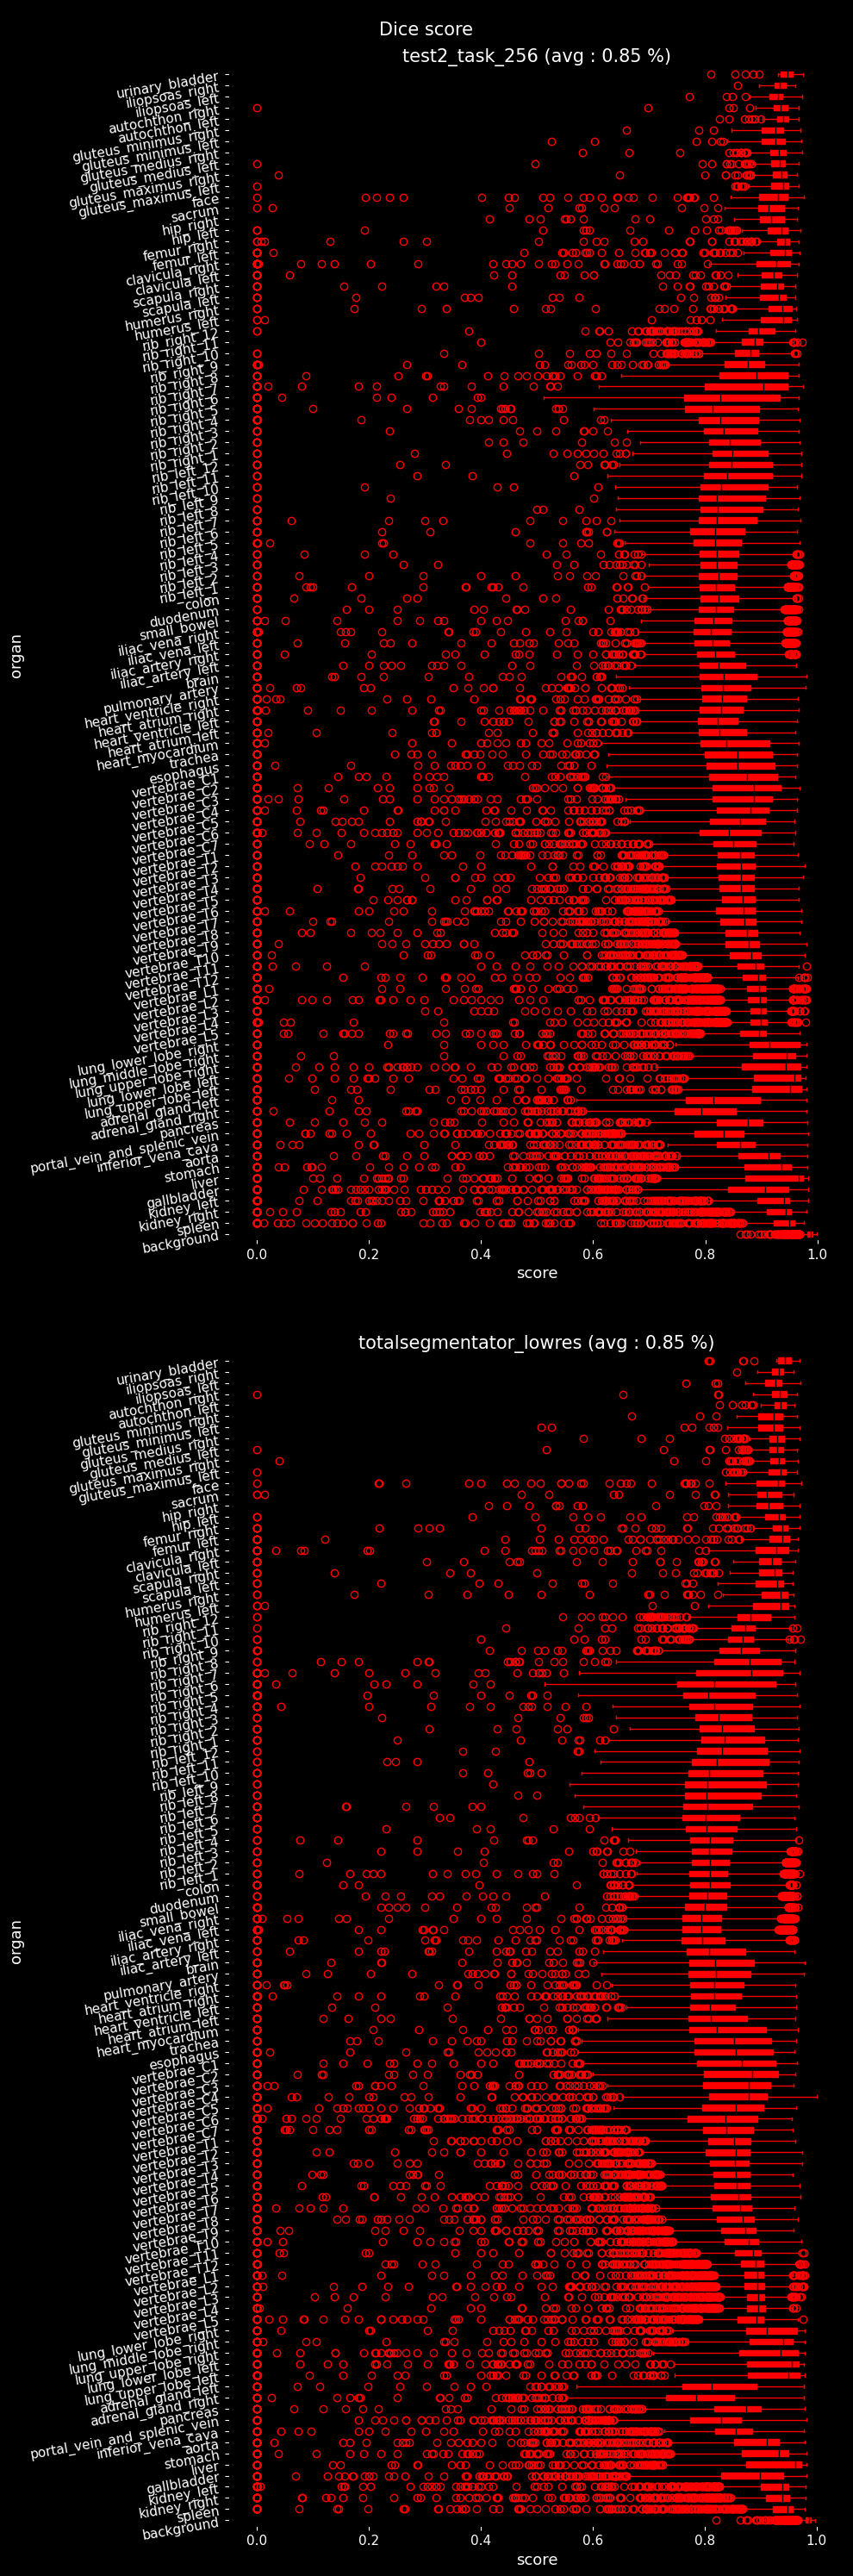

In [3]:
def compute_confusion_matrix(y_true, y_pred, labels):
    y_true = transform_mask(y_true, 'dense', is_one_hot = len(y_true.shape) == 4)
    y_pred = transform_mask(y_pred, 'dense', is_one_hot = len(y_pred.shape) == 4)
    
    if hasattr(y_true, 'numpy'): y_true = y_true.numpy()
    if hasattr(y_pred, 'numpy'): y_pred = y_pred.numpy()

    cm = multilabel_confusion_matrix(y_true.reshape([-1]), y_pred.reshape([-1]))
    return {
        label : {
            'tp' : cm[i, 1, 1], 'fp' : cm[i, 0, 1], 'fn' : cm[i, 1, 0], 'tn' : cm[i, 0, 0] 
        } for i, label in enumerate(labels) if i < len(cm)
    }

def compute_metrics(metrics, metric_name, ids = None):
    results = {m : [] for m in ['background'] + TOTALSEGMENTATOR_LABELS[1:]}
    for subj_id, infos in metrics.items():
        if ids and subj_id not in ids: continue
        for c, cm in infos.items():
            if c in (None, 'null'): c = 'background'
            results.setdefault(c, []).append(_metrics_methods[metric_name](** cm))
    
    return {c : [vi for vi in v if vi is not None] for c, v in results.items()}

def dice_coeff(tp, fp, fn, tn):
    if tp + fn + fp == 0: return None
    inter = tp
    union = 2 * tp + fp + fn
    return 2. * inter / max(1, union)

_metrics_methods = {
    'dice' : dice_coeff
}

importlib.reload(plot_utils)

samples   = dataset.iloc[:]
overwrite = False

alias   = {'test2_task_256' : 'converted_totalsegmentator_lowres'}
models  = ['test2_task_256', 'totalsegmentator_lowres']

all_results = {}
for model in models:
    model_dir = alias.get(model, model)
    
    for suffix in ('', ):
        if not os.path.exists(os.path.join('evaluations', model_dir + suffix)): continue
        
        results_file = os.path.join('evaluations', model_dir + suffix, 'results.json')
        results = load_json(results_file, default = {})

        for idx, row in tqdm(samples.iterrows(), total = len(samples)):
            subject = row['images'].split('/')[-2]
            if subject in results and not overwrite: continue

            pred_file = glob.glob(os.path.join('evaluations', model_dir + suffix, 'segmentations', '{}.*'.format(subject)))
            if not pred_file: continue
            pred_file = pred_file[0]
            
            sparse  = pred_file.endswith(('.npz', '.stensor'))

            true, _ = load_medical_data(row['segmentation'], labels = row['label'], mapping = TOTALSEGMENTATOR_LABELS)
            pred, _ = load_medical_data(pred_file, use_sparse = sparse, dtype = tf.int32 if not sparse else tf.uint8)

            if isinstance(pred, tf.sparse.SparseTensor):
                pred = sparse_argmax(pred)
            if pred.dtype in (np.float32, np.float64): pred = pred.astype(np.int32)

            #plot_volume(true, strides = 3)
            #plot_volume(pred, strides = 3)

            results[subject] = compute_confusion_matrix(true, pred, labels = TOTALSEGMENTATOR_LABELS)

            dump_json(results_file, results, indent = 4)

        if results:
            all_results[model + suffix] = results

formatted = {
    k : compute_metrics(v, 'dice') for k, v in all_results.items()
}

formatted = {
    '\n\n{} (avg : {:.2f} %)'.format(k, np.mean([np.mean(vi) for vi in v.values()])) : {'x' : v}
    for k, v in formatted.items()
}
plot_utils.plot_multiple(
    ** formatted,
    plot_type = 'boxplot', ncols = 1, x_size = 10, y_size = 15, ytick_rotation = 10, vert = False,
    xlabel = 'score', ylabel = 'organ', title = 'Dice score', use_subplots = True
)